# Exchange-Correlation Functionals 
**by <span style="color:darkgreen">Ute Werner</span> & <span style="color:darkgreen">Pasquale Pavone</span> for [<span style="color:darkgoldenrod">exciting *fluorine*</span>](http://exciting.wikidot.com/fluorine)**

<font size="2">(Jupyter notebook by <span style="color:darkgreen">Mara Voiculescu</span> & <span style="color:darkgreen">Martin Kuban</span>)</font>
<hr style="border:2px solid #DDD"> </hr>

**<span style="color:firebrick">Purpose</span>**:  In this tutorial, you will learn how to use different exchange-correlation (**XC**) functionals and the **libxc** library. As an example, the optimal volume and bulk modulus of silicon are calculated.
<hr style="border:2px solid #DDD"> </hr>

<div class="alert alert-block alert-warning">

**Table of Contents**
    
[0. Before Starting](#0)
    
[1. Introduction](#1)  
    
[2. Directly Implemented Functionals](#2)
   - Preparation of the Input File
   - Execute Calculations at Different Volumes
   - Post Processing: Comparison of XC Functionals

[3. Use of libxc](#3)
   - Example Calculation
    
[4. Exercises](#4)
    
[5. Literature](#5)
</div>

<a id='0'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">0. Before Starting</span>

**<span style="color:firebrick">Read the following paragraphs before starting with the rest of this tutorial!</span>**

Before running any Jupyter tutorials, please refer to the **`00_before_starting.md`** document on how to correctly set up the environment. This only needs to be done once. After which, the **venv** can be (re)activated from **`exciting`**'s root directory:

<div style="background-color: rgb(224, 224, 224);">

```bash
source tools/excitingjupyter/venv/excitingvenv/bin/activate
```

</div>

As a first step, you may create a running directory for the notebook.

In [1]:
%%bash
mkdir -p run_tutorial_xc_functionals

<a id='1'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">1. Introduction</span>

In this tutorial, we use ideas and scripts which are fully described in the tutorial **<span style="color:#3366BB">Volume optimization for cubic systems</span>**. Here, we will use these scripts to compare **XC** functionals, without going into the details of the scripts. The comparison of results obtained for the equilibrium volume and bulk modulus for different **XC** functionals gives information on the validity and applicability of the functionals.


<a id='2'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">2. Directly Implemented Functionals</span>

#### <span style="color:#15317E">i) Preparation of the Input File</span>

In this tutorial, we consider as an example the calculation of the energy-vs-volume curves for silicon in the fcc cubic structure. Inside the running directory, we create the file **input.xml** corresponding to a **SCF** calculation at a reference lattice constant. The input file employing the experimental lattice constant could look like the following.

<span class="SILICON_LDA"></span>
```xml
<input>
 
   <title>Silicon</title>
 
   <structure speciespath="$EXCITINGROOT/species">
      <crystal scale="10.261">
         <basevect> 0.0     0.5     0.5 </basevect>
         <basevect> 0.5     0.0     0.5 </basevect>
         <basevect> 0.5     0.5     0.0 </basevect>
      </crystal>
      <species speciesfile="Si.xml">
         <atom coord="0.00 0.00 0.00" />
         <atom coord="0.25 0.25 0.25" />
      </species>
   </structure>
 
   <groundstate  
      ngridk="8 8 8"
      swidth="0.01"
      rgkmax="8.0"
      xctype="LDA_PW">
   </groundstate>
 
</input>
```

The parameter <code><span style="color:mediumblue">xctype</span></code> specifies the **XC** functional that will be used in the calculation. In this example, the local spin density approximation (**LDA_PW**) is used. For further details and pararmeters see **[Input Reference](http://exciting.wikidot.com/ref:groundstate#attxctype)**.

Before starting the calculation, create a subdirectory called **LDA_PW**.

In [2]:
%%bash
cd run_tutorial_xc_functionals
mkdir -p LDA_PW
cd ..

The next step is writing the complete input as a string and saving it in your working directory as **input.xml**.

In [4]:
import os
from excitingjupyter.utilities import get_input_xml_from_notebook   

# Extract input file content from this notebook:
input_str = get_input_xml_from_notebook("tutorial_exchange_correlation_functionals", "SILICON_LDA")

# Write out the input as an XML file:
with open(os.path.join(os.getcwd(), 'run_tutorial_xc_functionals/LDA_PW/input.xml'), "w") as fid:
    fid.write(input_str)

Set the correct path for the **`exciting`** root directory (**$EXCITINGROOT**) to the one pointing to the place where the **`exciting`** directory is placed.

In [5]:
%%bash
cd run_tutorial_xc_functionals/LDA_PW
python3 -m excitingscripts.setup.excitingroot
cd ../..

#### <span style="color:#15317E">ii) Execute Calculations at Different Volumes</span>

Using the input file created above, you can perform calculations at different volumes for the <code><span style="color:mediumblue">xctype</span></code> = **"LDA_PW"** functional, as you learn more in details in the tutorial **<span style="color:#3366BB">Volume optimization for cubic systems</span>**. For a given exchenge-correlation functional, the recommended number of volume values for which a calculation should be done is **<span style="color:firebrick">11</span>**.

In [6]:
%%bash
cd run_tutorial_xc_functionals/LDA_PW
python3 -m excitingscripts.setup.volume_optimization 11
cd ../..

To execute the calculations, run

In [7]:
%%bash
cd run_tutorial_xc_functionals/LDA_PW
python3 -m excitingscripts.execute.volume_optimization 11
cd ../..

After completing the calculation for the **LDA_PW** functional, you can investigate other functionals. For instance, you can change in the input file **input.xml** the value of the attribute <code><span style="color:mediumblue">xctype</span></code> to **"GGA_PBE_SOL"** (general gradient approximation, **GGA**). Then, you can run **`exciting`** as above but changing the directory name to **GGA_PBE_SOL**, etc.

In [8]:
%%bash
cd run_tutorial_xc_functionals
mkdir -p GGA_PBE_SOL
cd ..

In [10]:
# The following lines modify the input.xml using Python
input_str_GGA = input_str.replace('"LDA_PW"','"GGA_PBE_SOL"')

with open(os.path.join(os.getcwd(), 'run_tutorial_xc_functionals/GGA_PBE_SOL/input.xml'), "w") as fid:
    fid.write(input_str_GGA)

In [11]:
%%bash
cd run_tutorial_xc_functionals/GGA_PBE_SOL
python3 -m excitingscripts.setup.excitingroot
cd ../..

In [12]:
%%bash
cd run_tutorial_xc_functionals/GGA_PBE_SOL
python3 -m excitingscripts.setup.volume_optimization 11
cd ../..

In [13]:
%%bash
cd run_tutorial_xc_functionals/GGA_PBE_SOL
python3 -m excitingscripts.execute.volume_optimization 11
cd ../..

#### <span style="color:#15317E">iii) Post Processing: Comparison of XC Functionals</span>

In order to compare the different **XC** functionals, you may calculate the lattice constant and the bulk modulus by entering the directory related to the exchange-correlation functional you choose and running there the script **`excitingscripts.plot.newbrich`**.

In [14]:
%%bash
cd run_tutorial_xc_functionals/LDA_PW
python3 -m excitingscripts.plot.newbirch 
cd ../..

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
     V0        B0         Bp        a-sc       a-bcc      a-fcc     log(chi)
  266.07236    96.128     4.272     6.4318     8.1036    10.2099      -5.87
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Compare your results to the experimental values, which you can obtain, e.g., from the **[WebElements](https://www.webelements.com/)** site. You can also use the Python script **`excitingscripts.plot.volumecurves`** for a graphical comparison of the energy-versus-volume values for different functionals.

In [22]:
%%bash
cd run_tutorial_xc_functionals
python3 -m excitingscripts.plot.volumecurves -r LDA_PW GGA_PBE_SOL
cd ..

Using the given example you will obtain the following plot.

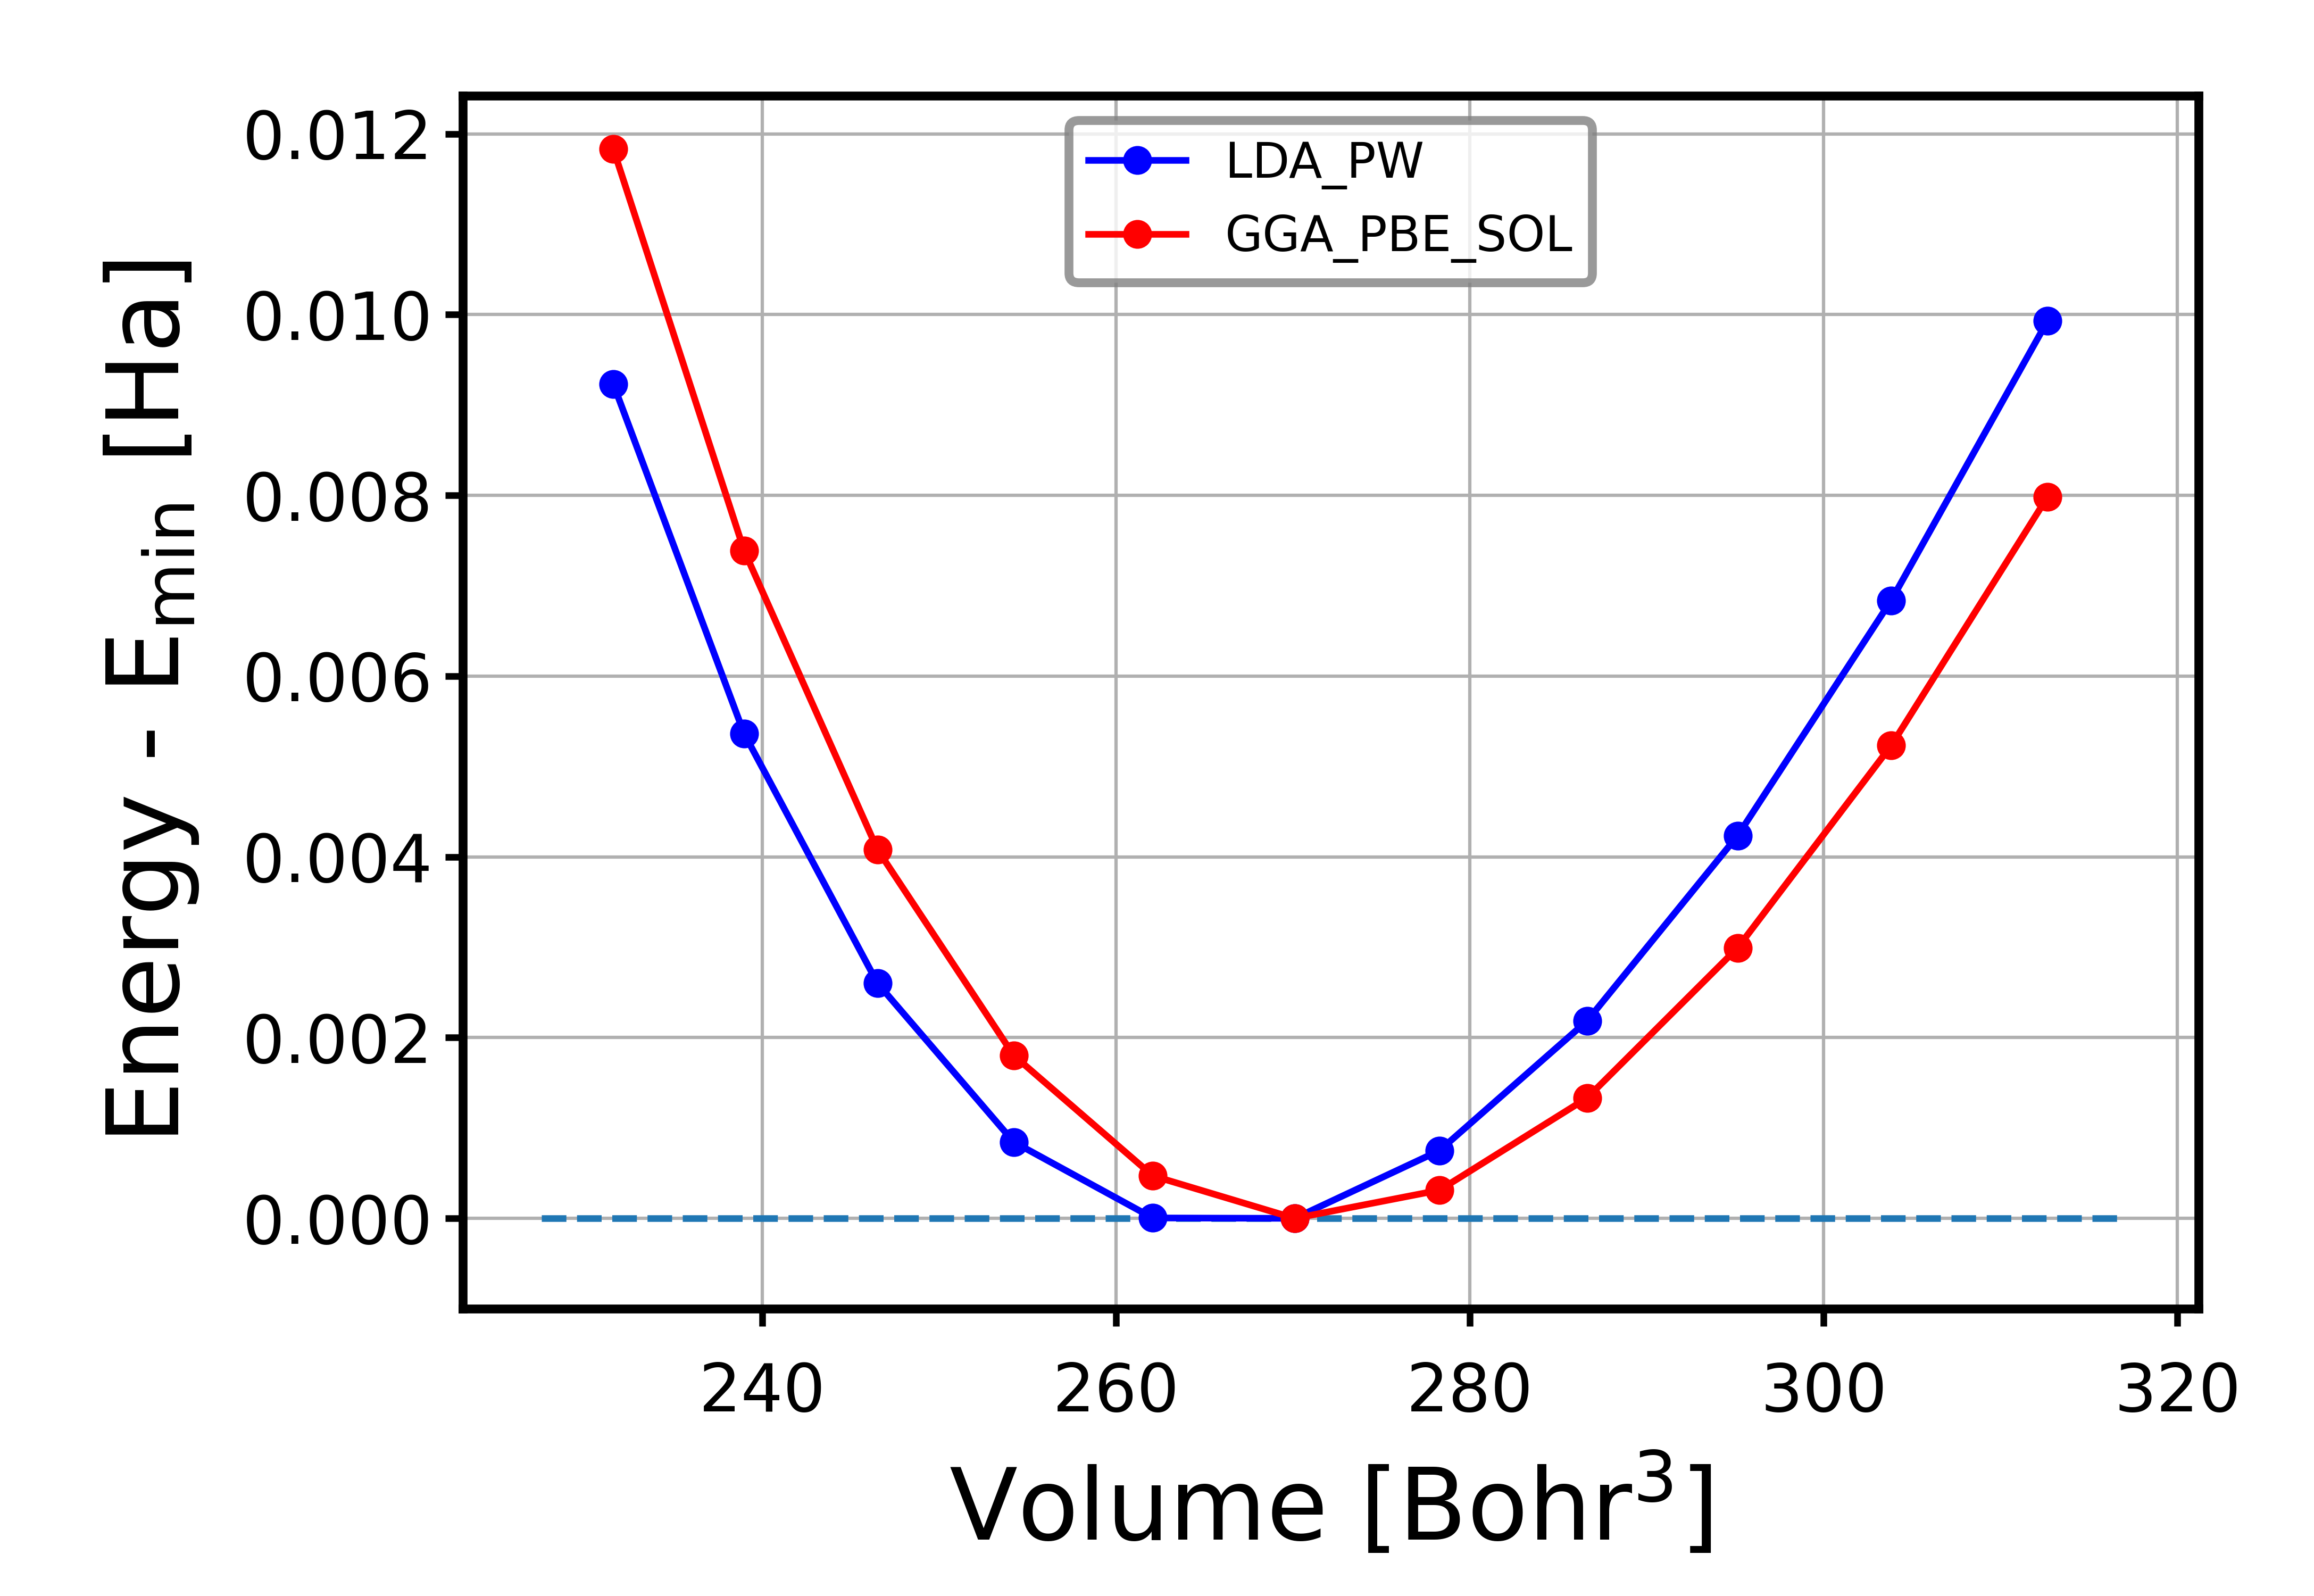

In [23]:
from IPython.display import Image
display(Image('run_tutorial_xc_functionals/PLOT.png', width = 600))

For a better comparison, the minima of the energy-vs-volume values are shifted to zero.

<a id='3'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">3. Use of libxc</span>
In order to use a wider variety of **XC** functionals or to combine different functionals for exchange and correlation, the **libxc** library can be used. For this purpose, the element <code><span style="color:green">libxc</span></code> can be added to the <code><span style="color:green">groundstate</span></code> element in the **`exciting`** input. The XC functional can then be chosen with the attributes <code><span style="color:mediumblue">xc</span></code> or <code><span style="color:mediumblue">exchange</span></code> and <code><span style="color:mediumblue">correlation</span></code>, as described in detail in **[Input Reference](http://exciting.wikidot.com/ref:groundstate#libxc)**.

**<span style="color:green">Remarks</span>**:
- Not every functional, especially not every combination of exchange and correlation, may give stable results. For more details on the validity and applicability of different functionals, please look at the tables shown **[here](http://exciting.wikidot.com/libxc)**.
- Further details concerning different functionals can be found in the **[libxc wiki](https://www.tddft.org/programs/libxc/)**.

#### <span style="color:#15317E">Example Calculation</span>

Repeat the calculation for silicon from the previous section, but this time employing the **libxc** library. For this purpose, use the previous input file and replace the groundstate element with the following lines.

```xml
...
   <groundstate  
      ngridk="8 8 8"
      swidth="0.01"
      rgkmax="8.0">
      <libxc 
         correlation="XC_GGA_C_PBE" 
         exchange="XC_GGA_X_PBE">
      </libxc>
   </groundstate>
...

```

In [25]:
%%bash
cd run_tutorial_xc_functionals
mkdir -p libxc_functional
cd ..

In [32]:
# The following lines modify the input.xml using Python
groundstate_libxc = """<groundstate  
      ngridk="8 8 8"
      swidth="0.01"
      rgkmax="8.0">
      <libxc 
         correlation="XC_GGA_C_PBE" 
         exchange="XC_GGA_X_PBE">
      </libxc>
   </groundstate>
"""

index1=input_str.find("<groundstate")
index2=input_str.find("</input>")

input_str_libxc = input_str[:index1] + groundstate_libxc +"\n"+ input_str[index2:]

with open(os.path.join(os.getcwd(), 'run_tutorial_xc_functionals/libxc_functional/input.xml'), "w") as fid:
    fid.write(input_str_libxc)

In [33]:
%%bash
cd run_tutorial_xc_functionals/libxc_functional
python3 -m excitingscripts.setup.excitingroot
cd ../..

In [1]:
%%bash
cd run_tutorial_xc_functionals/libxc_functional
python3 -m excitingscripts.setup.volume_optimization 11
cd ../..

In [2]:
%%bash
cd run_tutorial_xc_functionals/libxc_functional
python3 -m excitingscripts.execute.volume_optimization 11
cd ../..

If you plot your new results together with the previous results from **LDA_PW** and **GGA_PBE_SOL** using the script **`excitingscripts.plot.volumecurves`**, you will obtain the following plot:

In [3]:
%%bash
cd run_tutorial_xc_functionals
python3 -m excitingscripts.plot.volumecurves -r LDA_PW GGA_PBE_SOL libxc_functional
cd ..

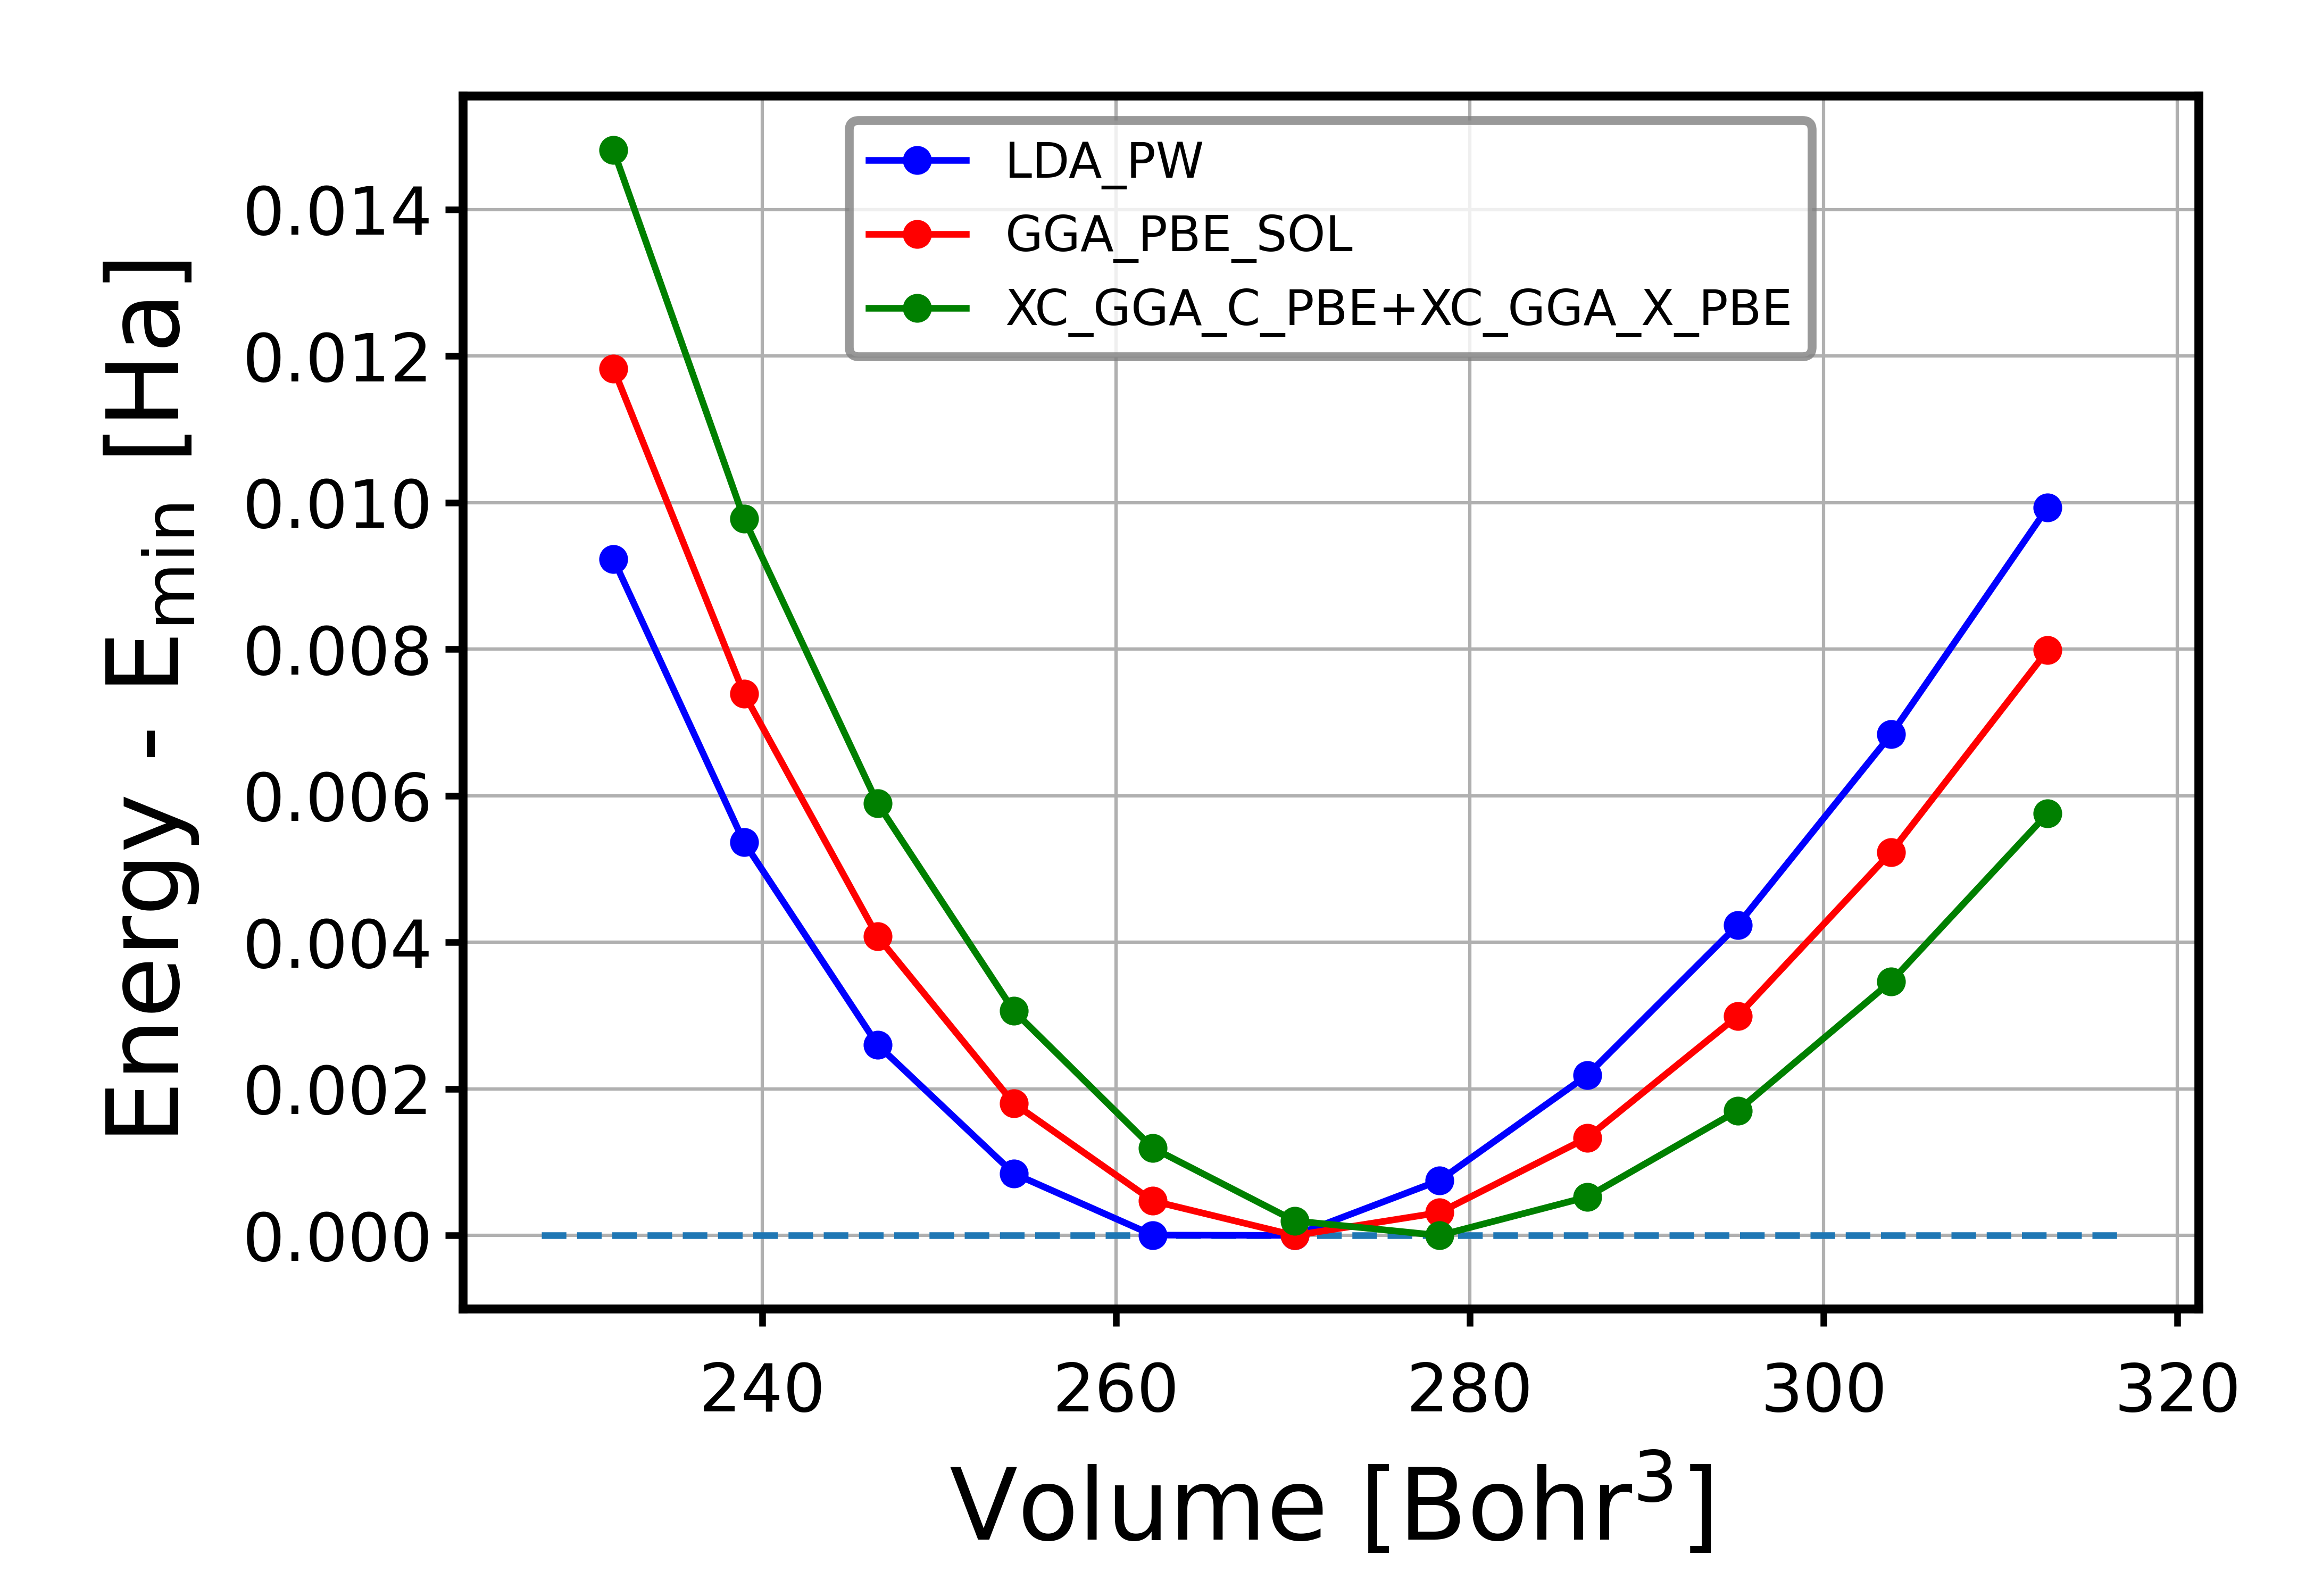

In [4]:
display(Image('run_tutorial_xc_functionals/PLOT.png', width = 600))

<a id='4'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">4. Exercises</span>

- Repeat the example of silicon for different **XC** functionals and try to find the best agreement with the experimental values.
- Investigate the influence of different combinations of exchange and correlation functionals on calculations performed for another material, *e.g.*, silver.

<a id='5'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">5. Literature</span>


- **LDA_PW**: J. P. Perdew and Y. Wang, *Phys. Rev.* B **23**, 5048 (1981); D.M. Ceperly and B.J. Alder, *Phys. Rev. Lett.* **45**, 566 (1980)
- **GGA_PBE_SOL**: J. P. Perdew, A. Ruzsinszky, G. I. Csonka, O. A. Vydrov, G. E. Scuseria, L. A. Constantin, X. Zhou, and K. Burke, *Phys. Rev. Lett.* **100**, 136406 (2008); Erratum: *Phys. Rev. Lett.* **102**, 039902 (2009)
- **GGA_PBE**: J. P. Perdew, K. Burke, and M. Ernzerhof, *Phys. Rev. Lett.* **77**, 3865 (1996)

<hr style="border:2px solid #DDD"> </hr>